## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import IPython.display as display
import cv2

### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [27]:
dataset_dir = 'C:/Users/pranj/Downloads/dataset/plantvillage dataset/color'

#creating a dataframe with label
def create_dataframe(dataset_dir):
    # List to store path and label
    path = []
    label = []

    # List all subfolders in the current data path
    folder = os.listdir(dataset_dir)
    
    # Iterate through each subfolder
    for subfolder in folder:
        f_path = os.path.join(dataset_dir, subfolder)
        imgs = os.listdir(f_path)
        
        # Iterate through images in the subfolder
        for img in imgs:
            img_path = os.path.join(f_path, img)
            
            # Append image path and corresponding label
            path.append(img_path)
            label.append(subfolder)

    # Create Pandas Series for path and label
    fseries = pd.Series(path, name='path')
    lseries = pd.Series(label, name='label')

    # Concatenate into a DataFrame and return
    return pd.concat([fseries, lseries], axis=1)

# Create DataFrames for train, test, and val
df = create_dataframe(dataset_dir)

df.head()

,path,label
0,C:/Users/pranj/Downloads/dataset/plantvillage ...,Apple___Apple_scab
1,C:/Users/pranj/Downloads/dataset/plantvillage ...,Apple___Apple_scab
2,C:/Users/pranj/Downloads/dataset/plantvillage ...,Apple___Apple_scab
3,C:/Users/pranj/Downloads/dataset/plantvillage ...,Apple___Apple_scab
4,C:/Users/pranj/Downloads/dataset/plantvillage ...,Apple___Apple_scab


Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

image for disease : 'rot'


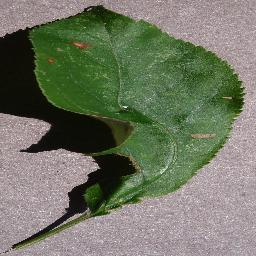

image for disease : 'healthy'


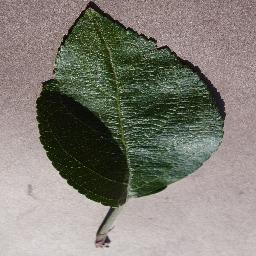

image for disease : 'Tomato_mosaic_virus'


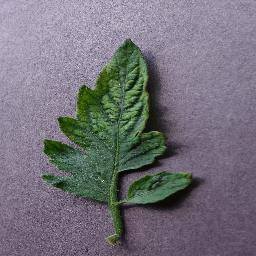

In [29]:
file_paths = df['path']

disease_names = ["rot",'healthy','Tomato_mosaic_virus']

# Variable to store the first matching file path
first_matching_file_path = None

# Dictionary to store the first matching file path for each search word
first_matching_file_paths = {}

# Find the first file path for each search word
for word in disease_names:
    for path in file_paths:
        if word in path:
            first_matching_file_paths[word] = path
            break

# Print the first matching file path for each search word
for word, path in first_matching_file_paths.items():
    print(f"image for disease : '{word}'")
    with open(path, 'rb') as f:
        display.display(display.Image(data = f.read(), width = 200))



### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

In [31]:
# Function to extract characteristics of images in the dataset
def extract_image_characteristics(dataset_dir):
    # Initialize lists to store characteristics
    image_sizes = []
    image_means = []
    image_stds = []

    # Iterate through each class folder in the dataset directory
    for class_folder in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_folder)
        
        # Iterate through each image in the class folder
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            
            # Get size of the image
            height, width, _ = image.shape
            image_sizes.append((height, width))
            
            # Calculate mean and standard deviation of pixel values
            mean = np.mean(image)
            std = np.std(image)
            image_means.append(mean)
            image_stds.append(std)

    return image_sizes, image_means, image_stds

# Call the function to extract characteristics
sizes, means, stds = extract_image_characteristics(dataset_dir)

# Calculate sample frequency
num_images = len(sizes)
sample_frequency = num_images / len(os.listdir(dataset_dir))

# Print extracted characteristics
print("Image Characteristics:")
print("Number of Images:", num_images)
print("Sample Frequency:", sample_frequency)
print("Mean Image Size:", np.mean(sizes, axis=0))
print("Mean Pixel Value (across all images):", np.mean(means))
print("Standard Deviation of Pixel Values (across all images):", np.mean(stds))


Image Characteristics:
Number of Images: 54305
Sample Frequency: 1429.078947368421
Mean Image Size: [256. 256.]
Mean Pixel Value (across all images): 116.09953801268331
Standard Deviation of Pixel Values (across all images): 46.1434936781745


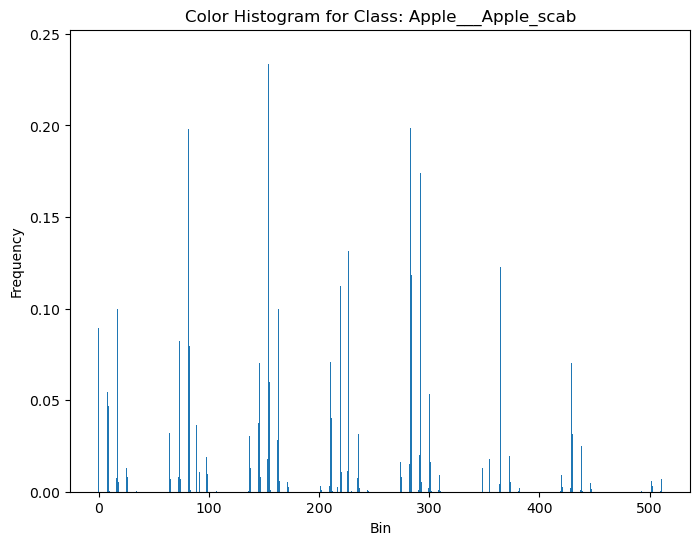

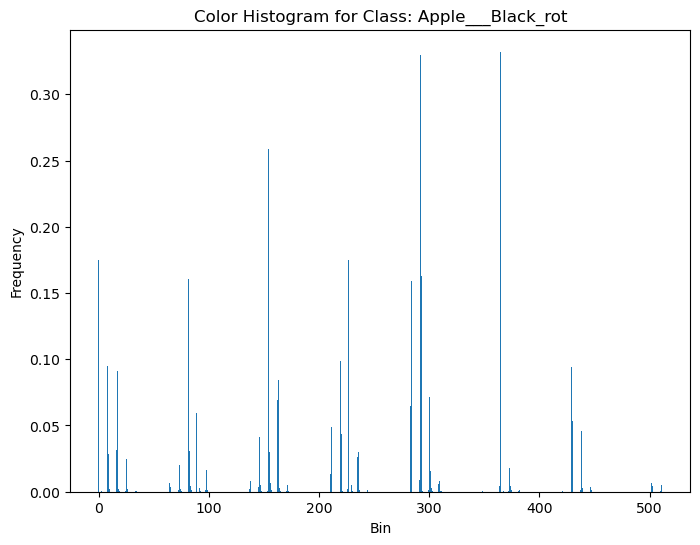

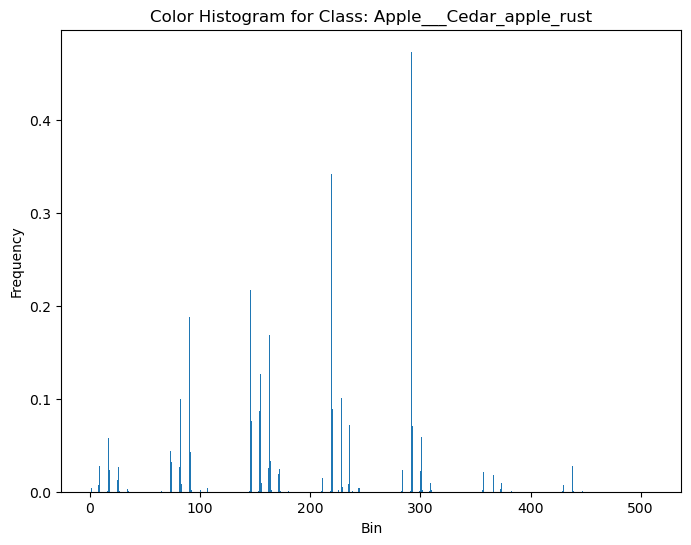

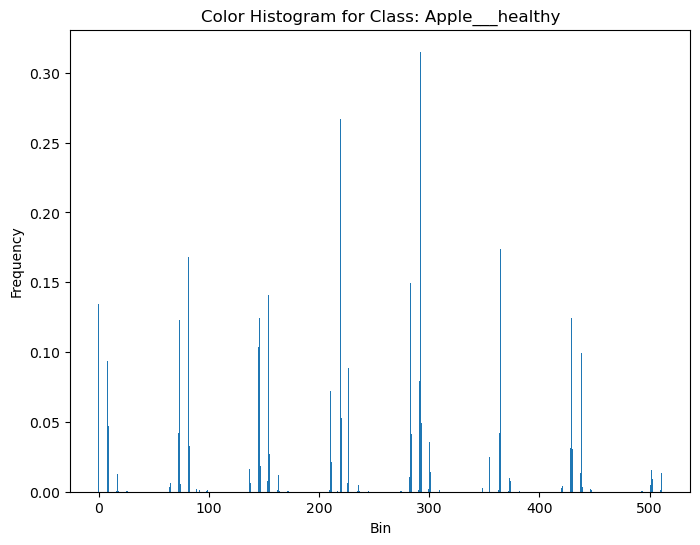

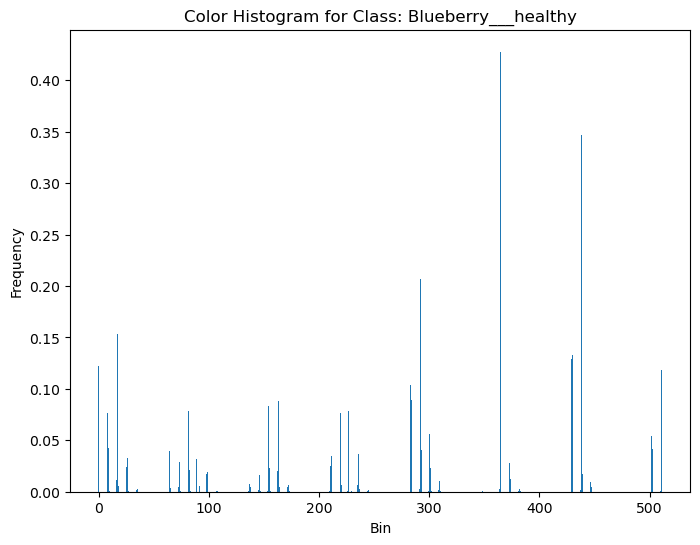

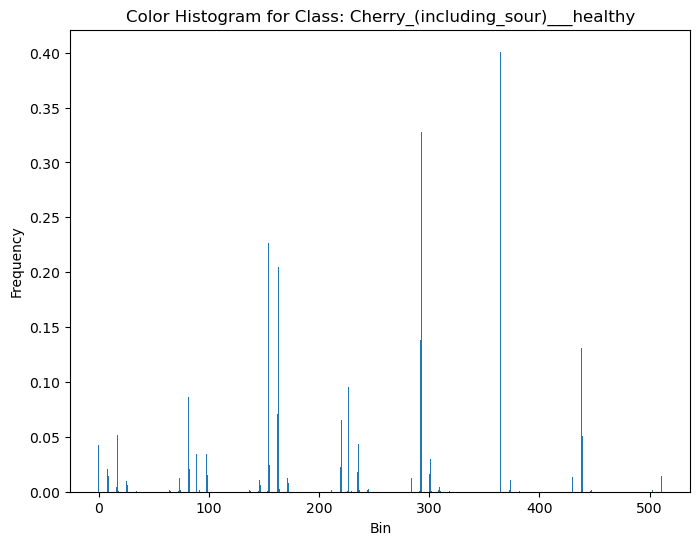

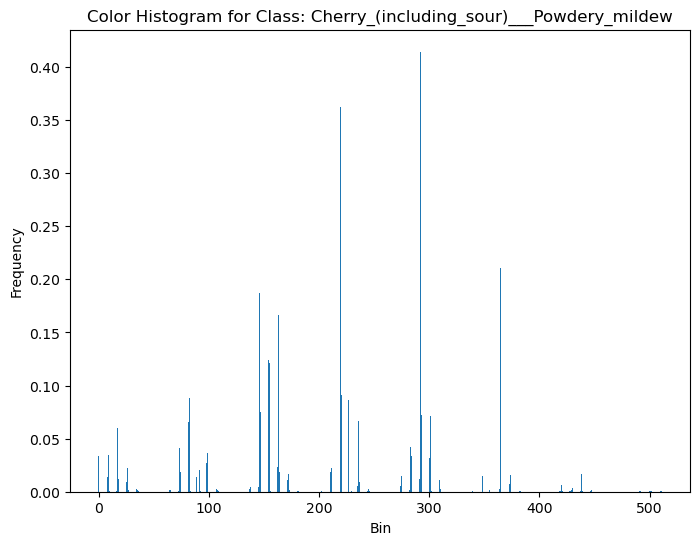

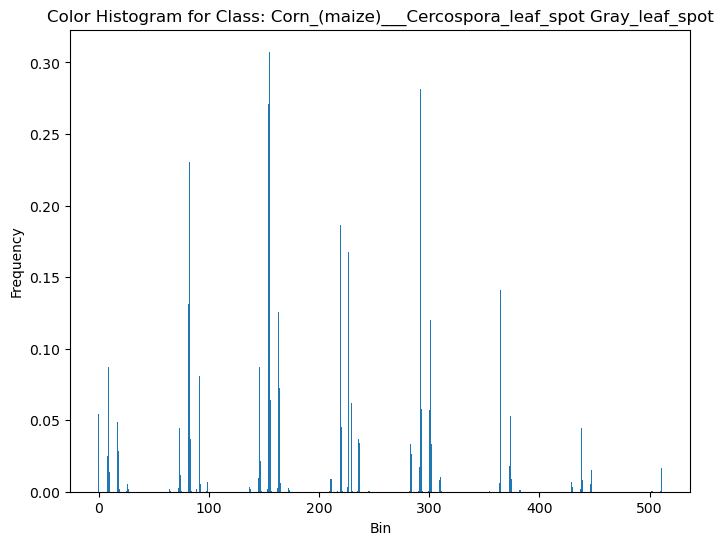

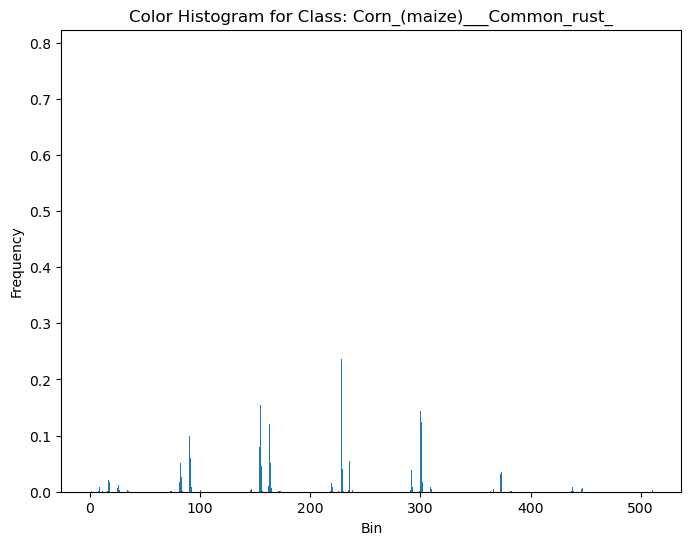

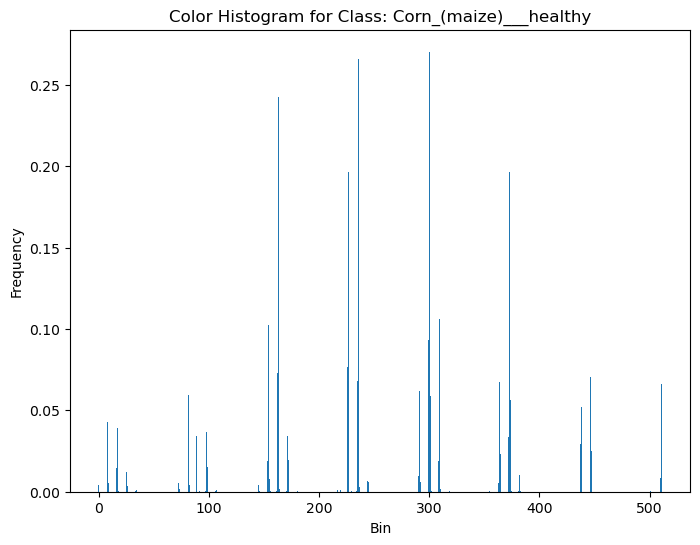

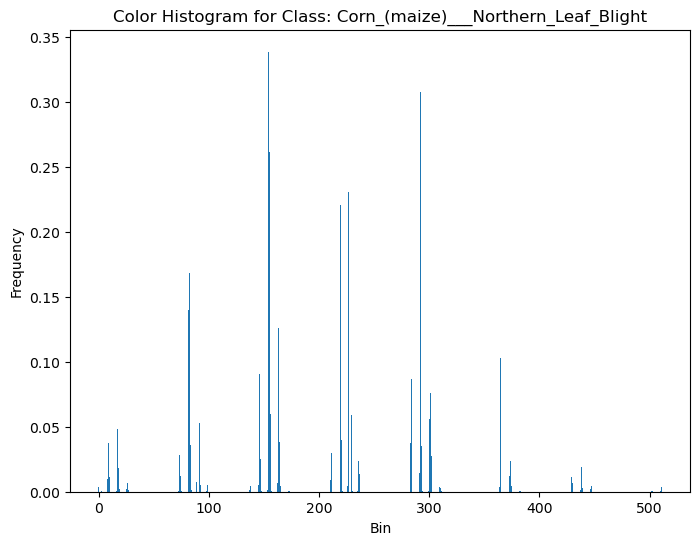

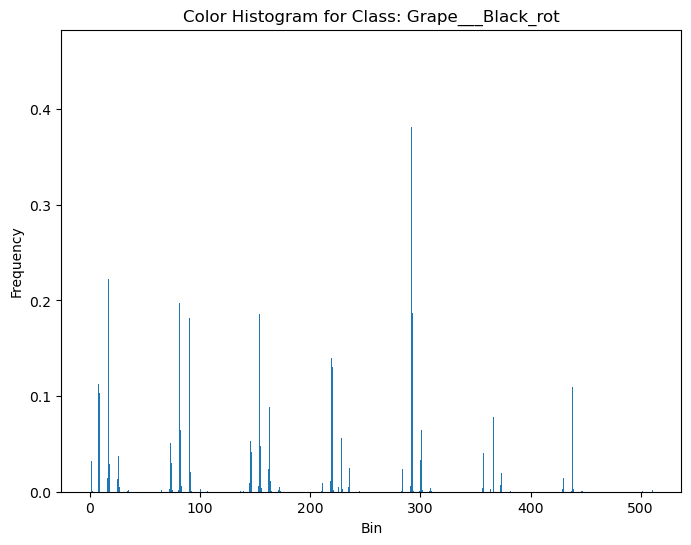

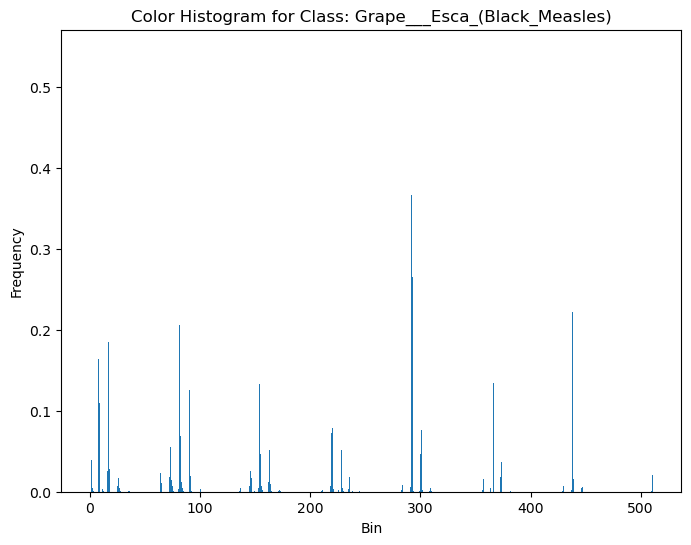

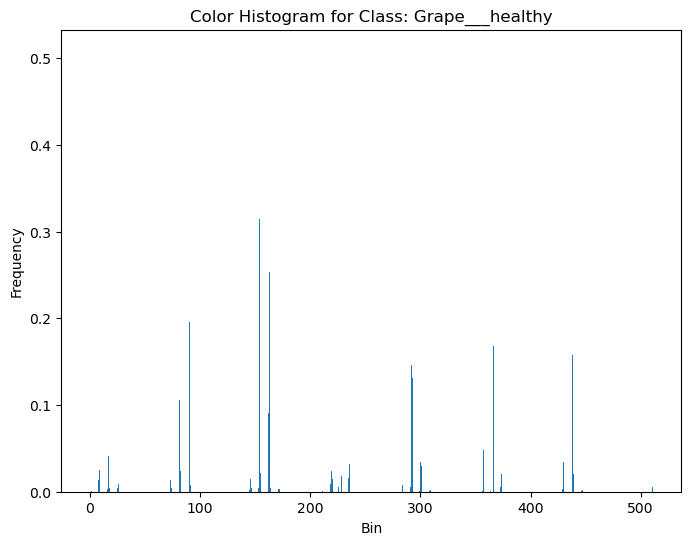

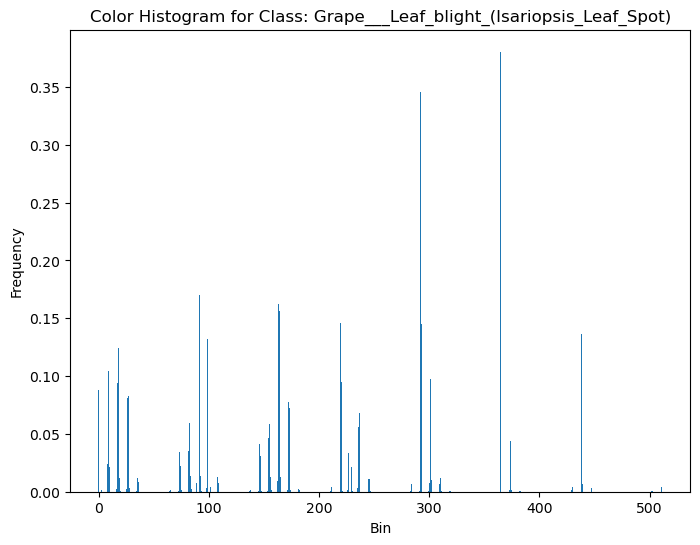

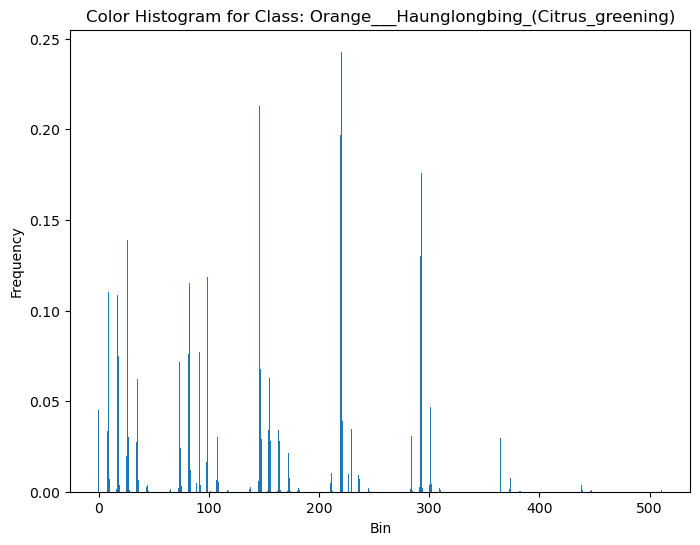

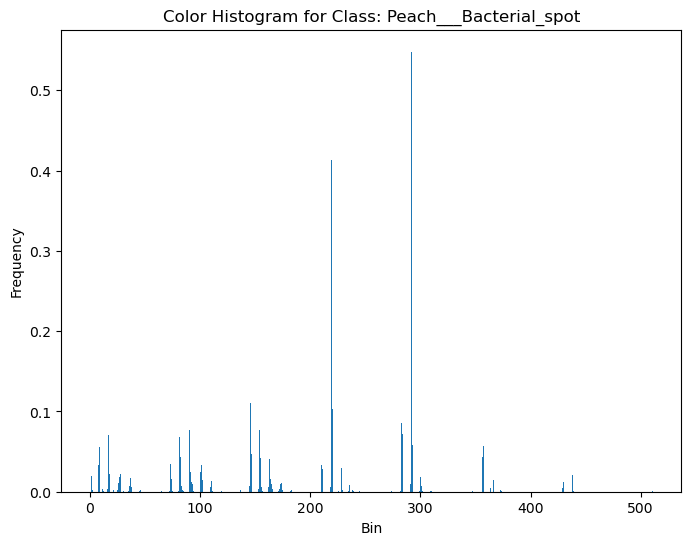

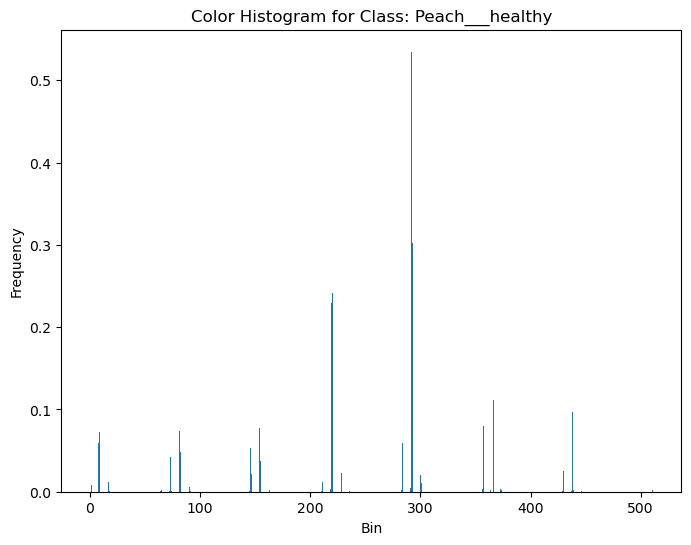

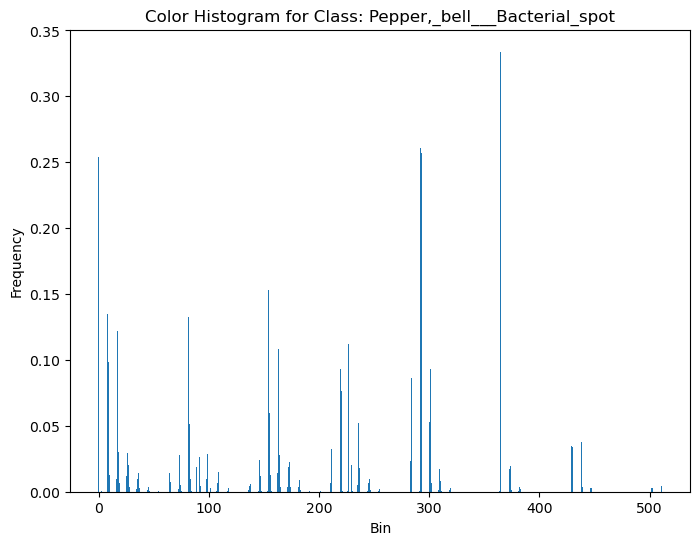

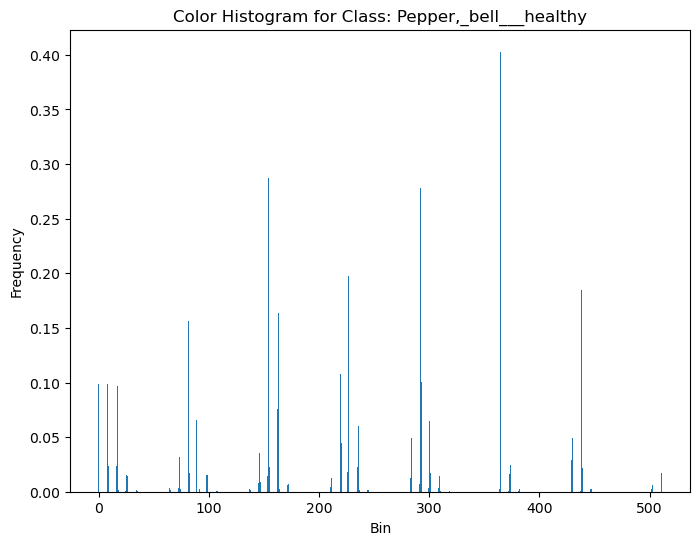

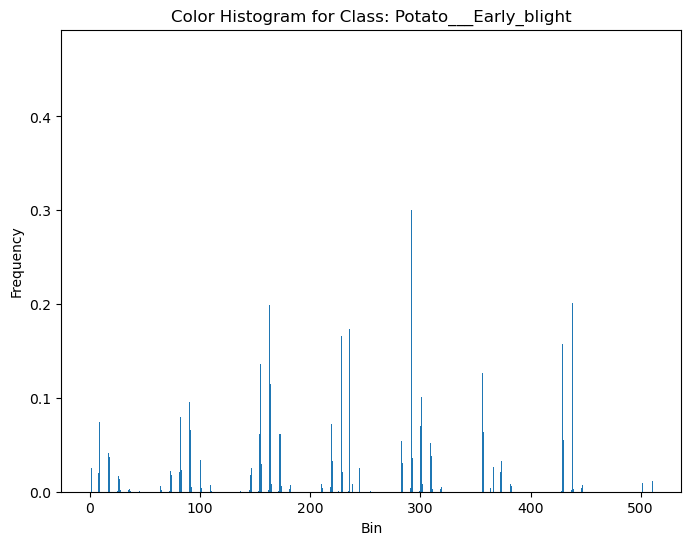

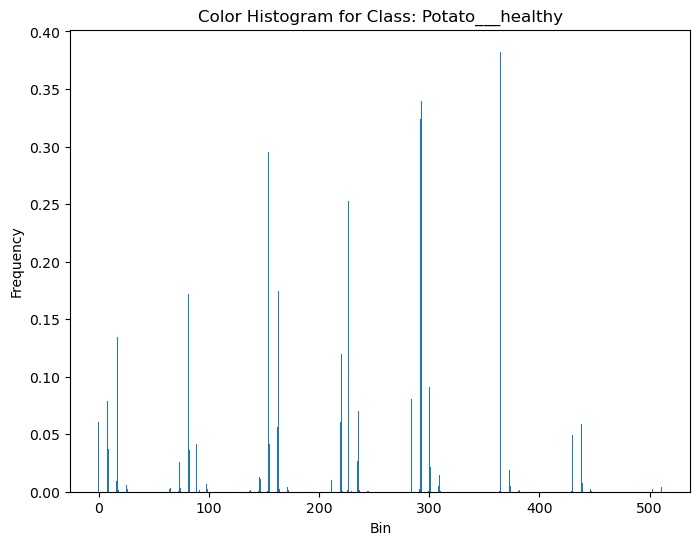

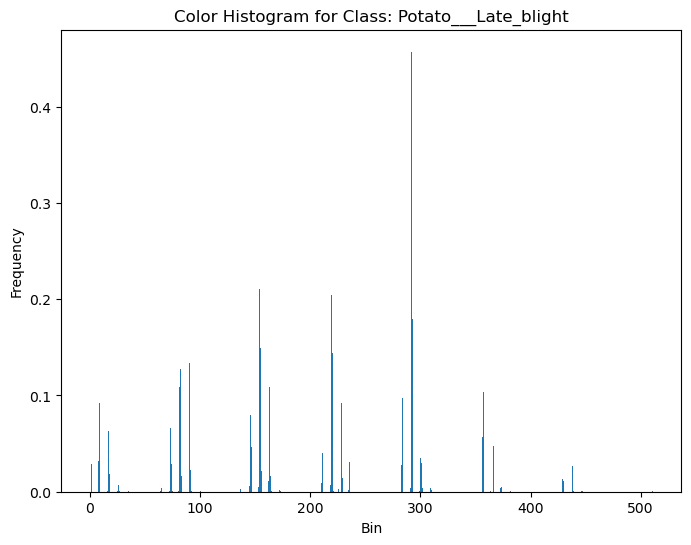

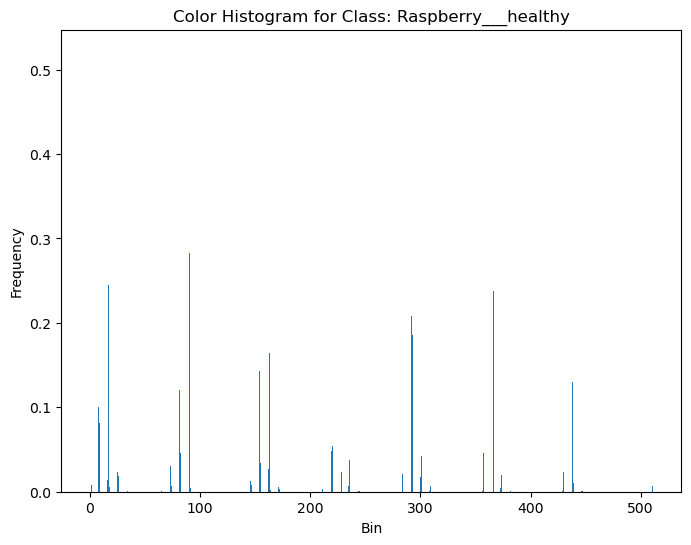

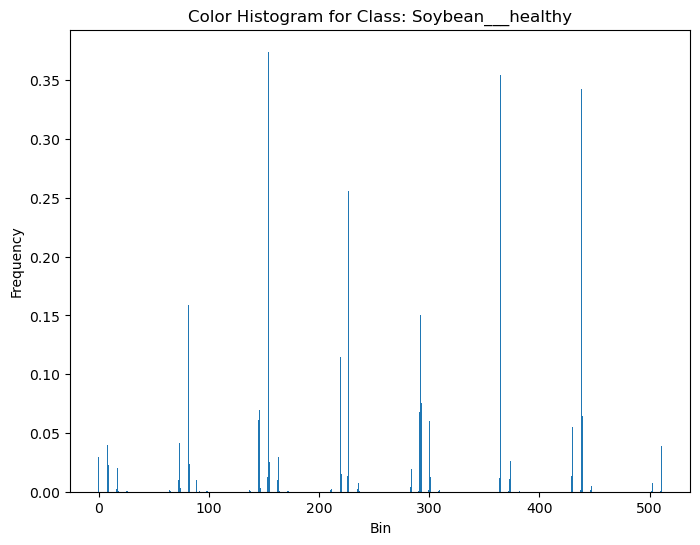

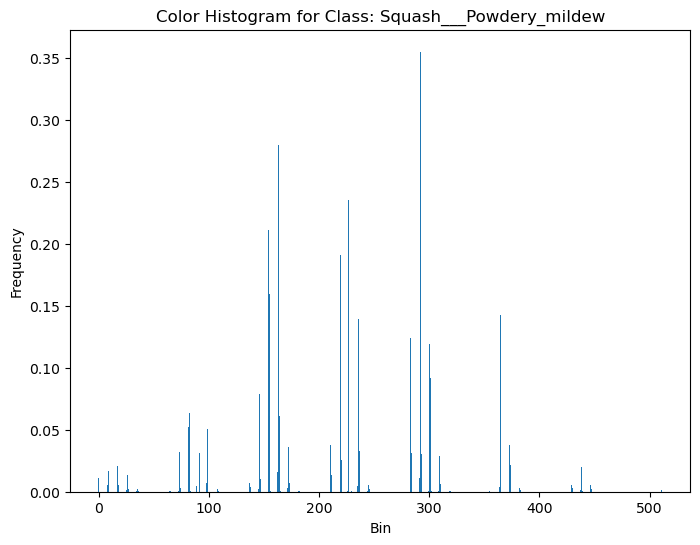

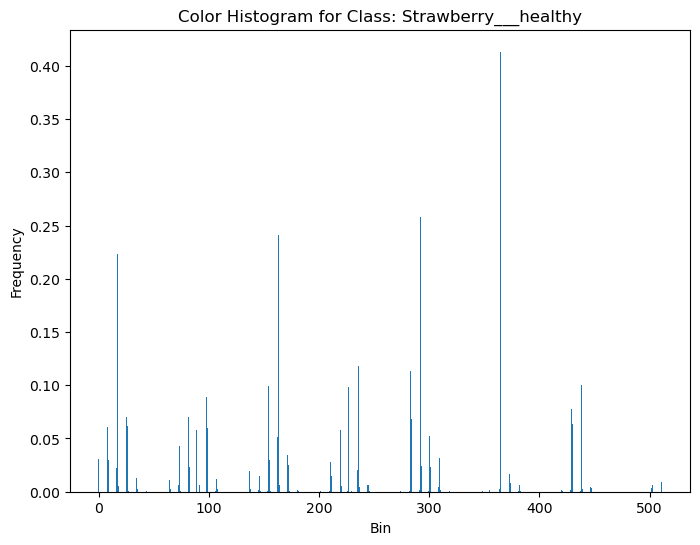

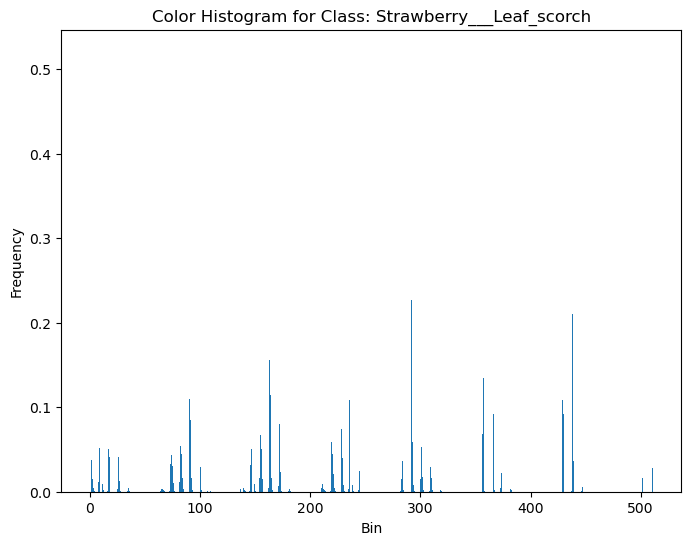

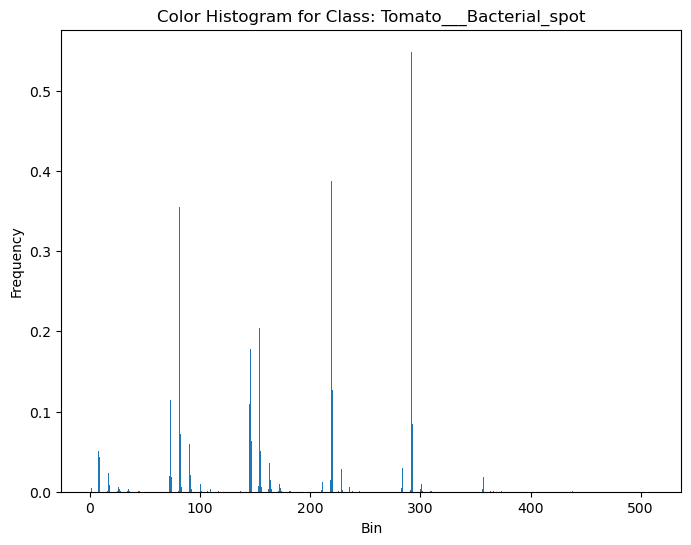

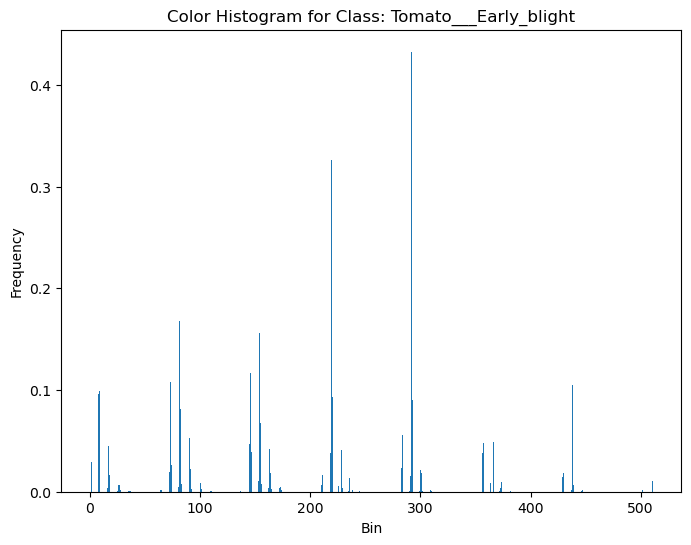

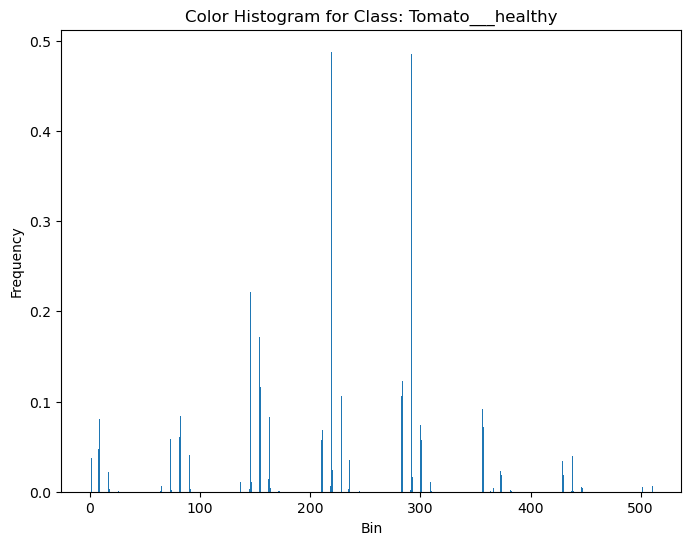

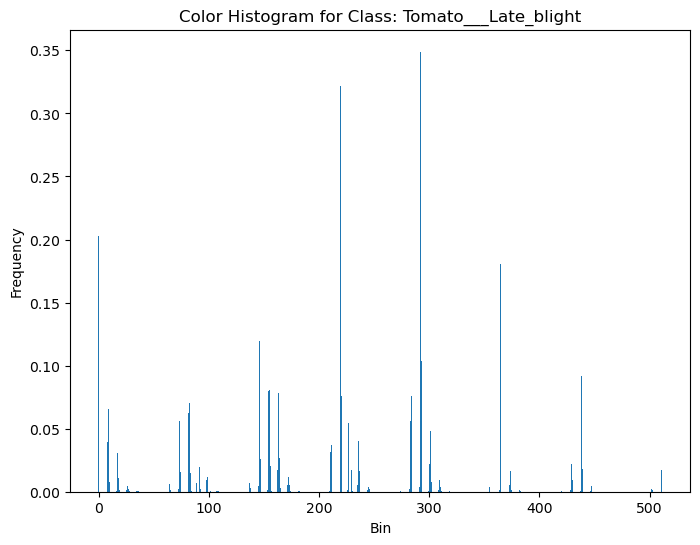

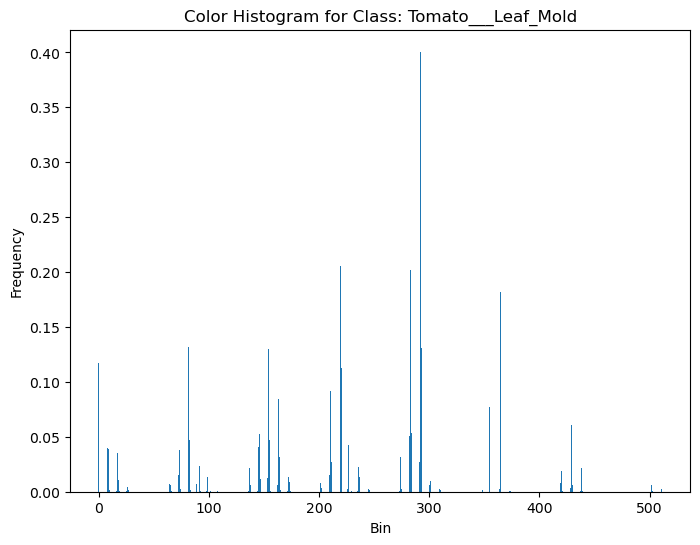

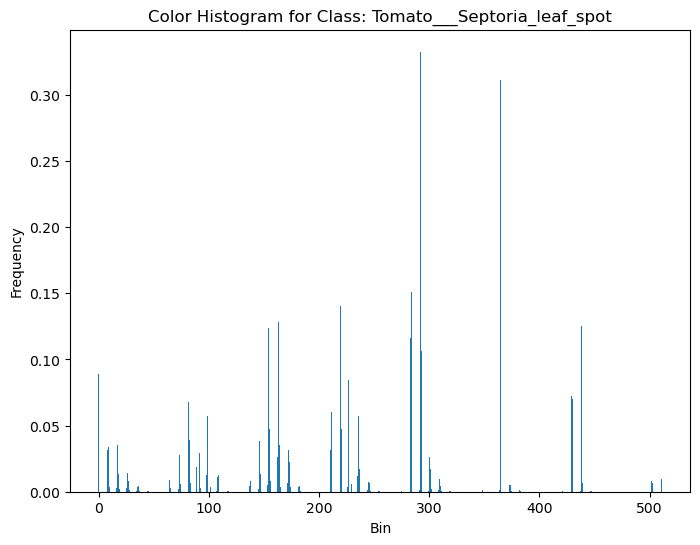

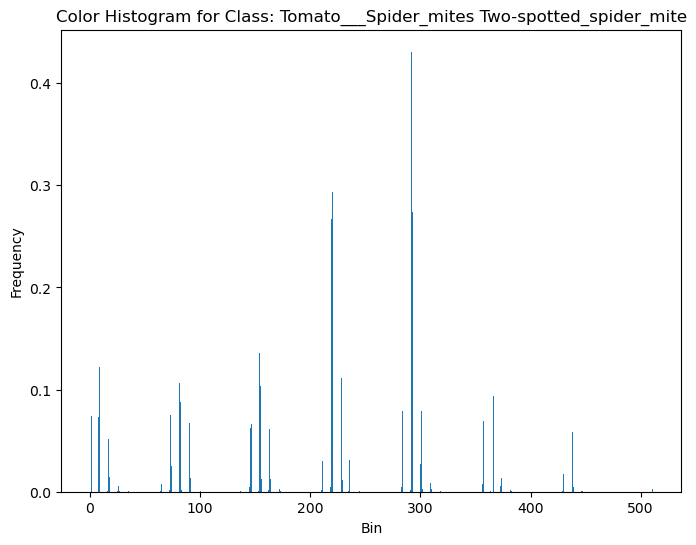

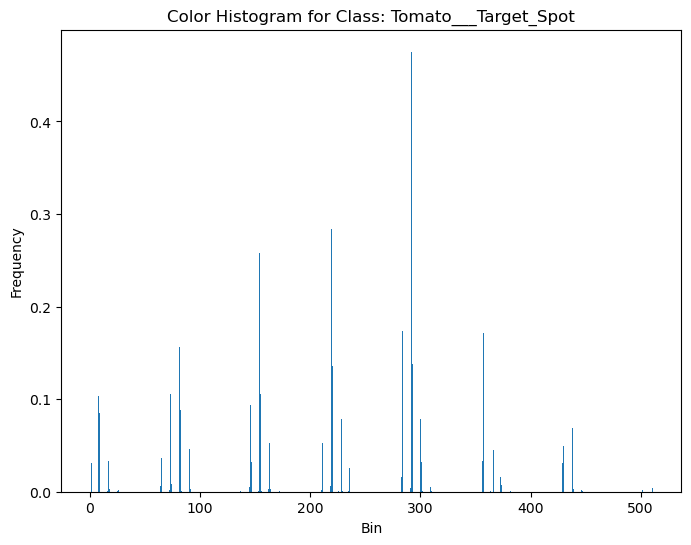

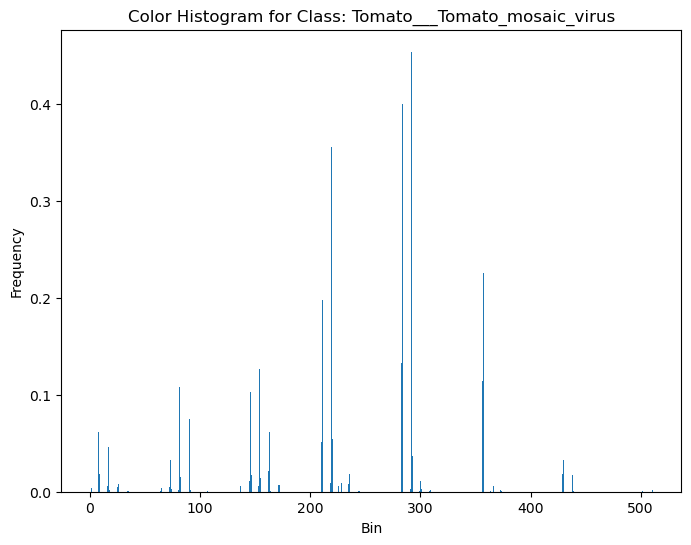

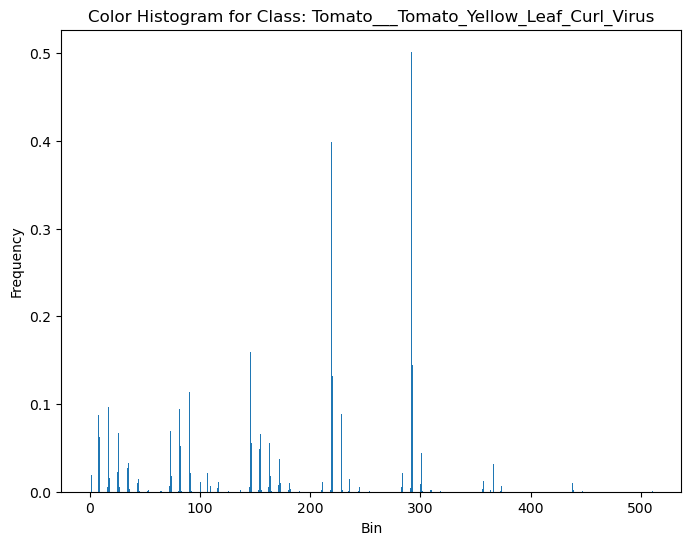

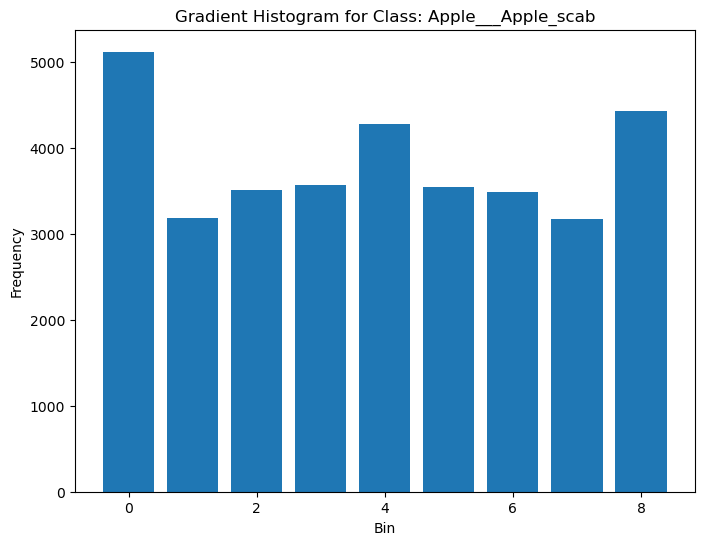

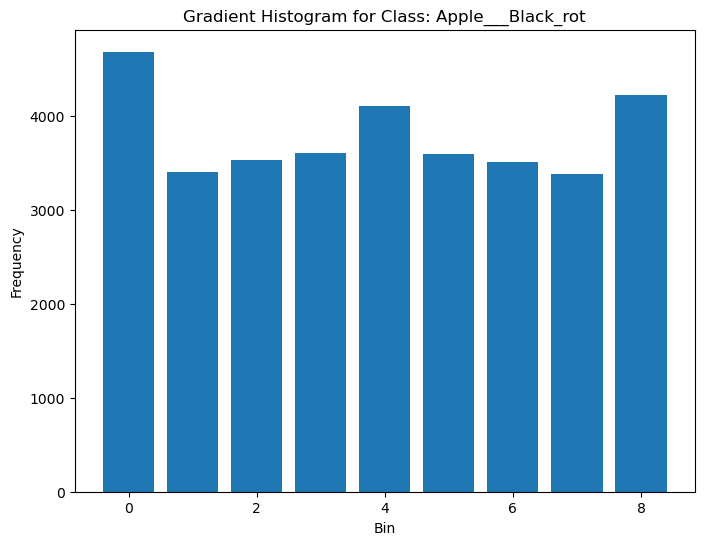

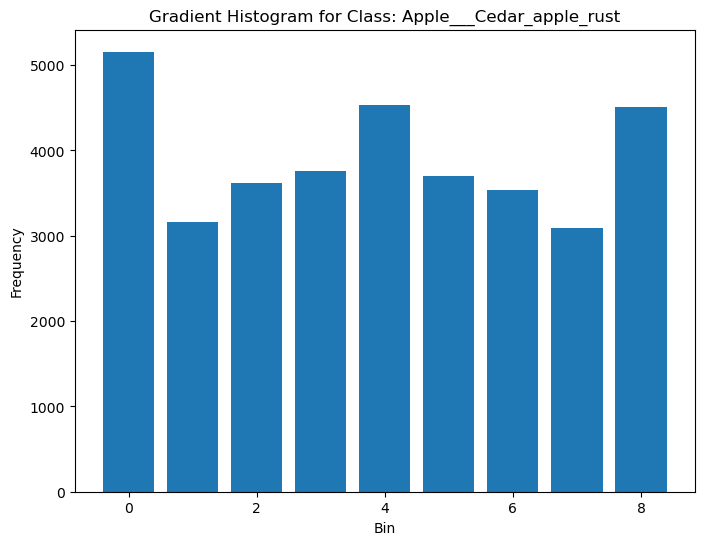

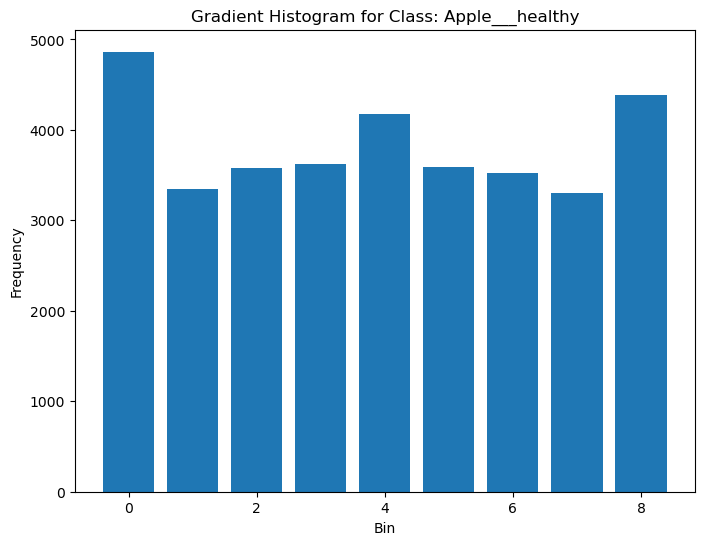

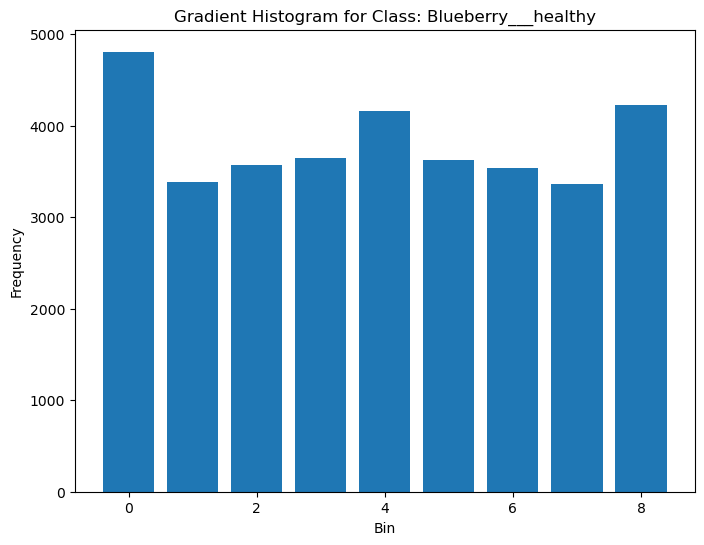

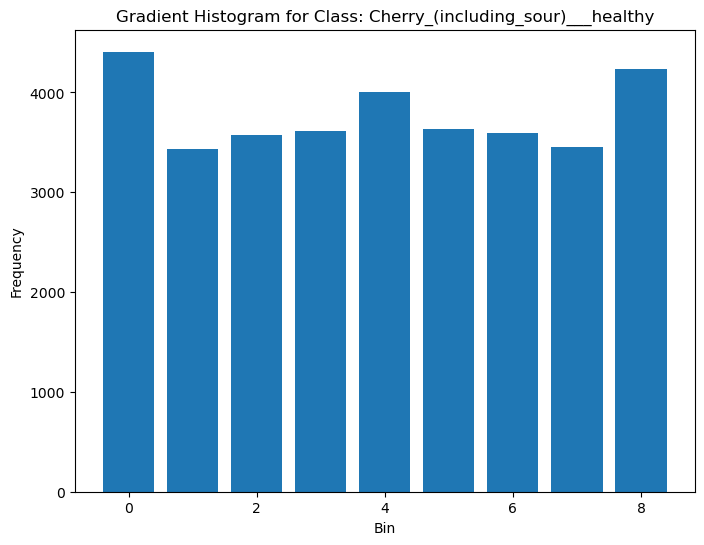

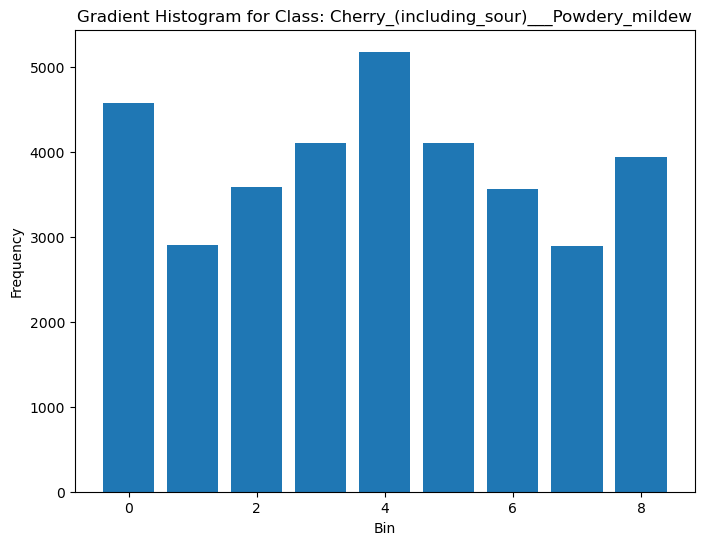

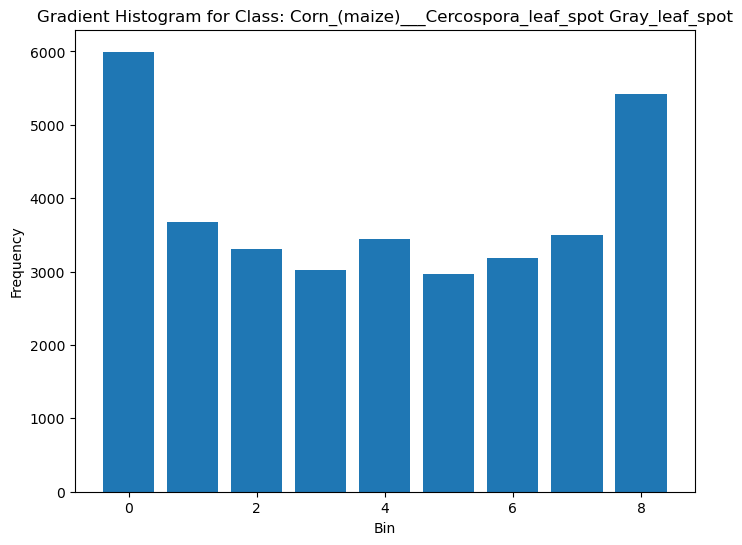

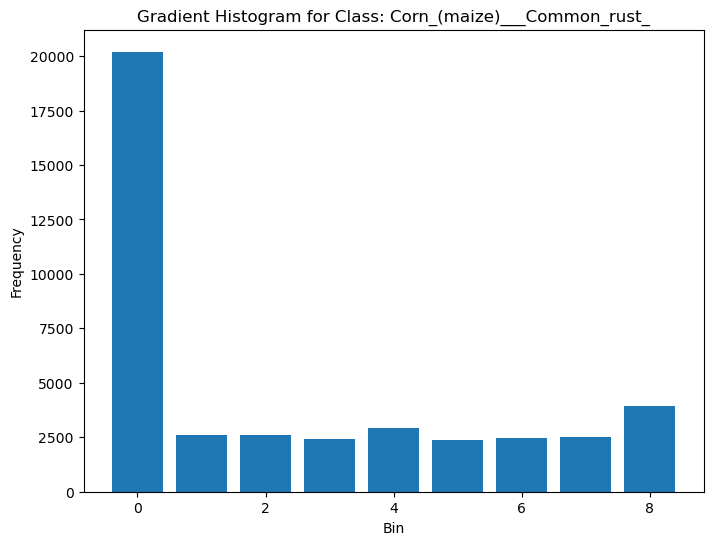

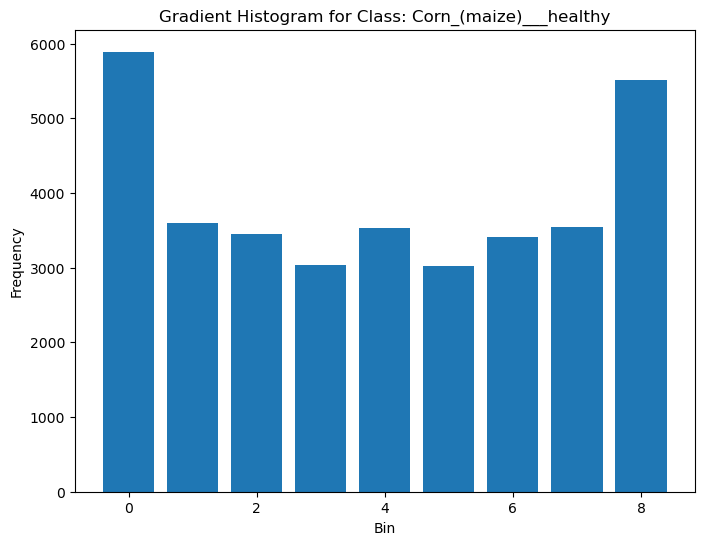

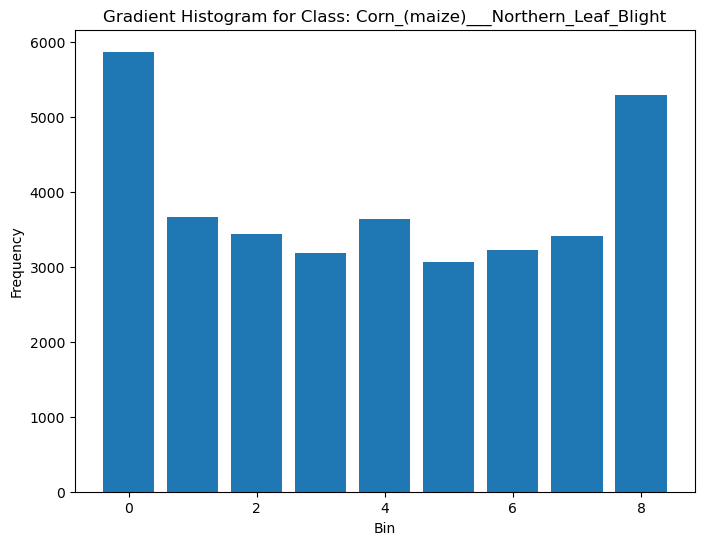

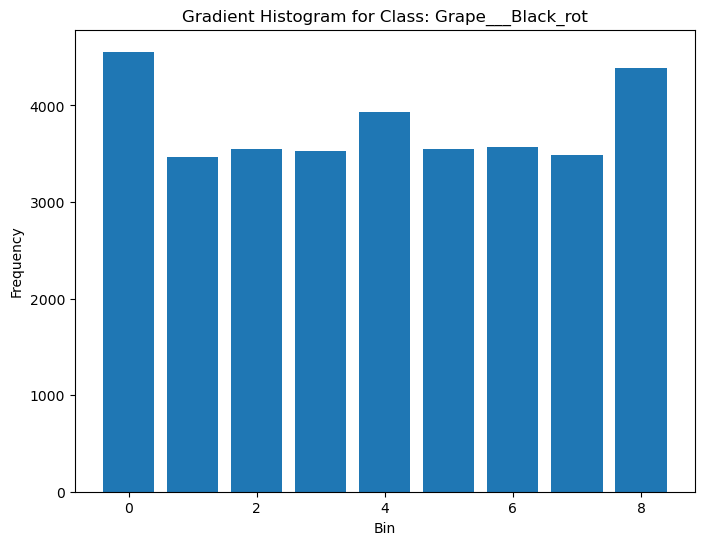

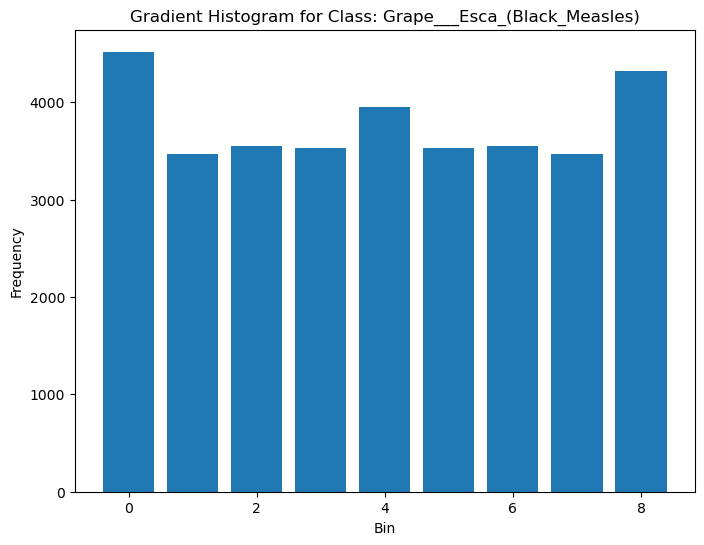

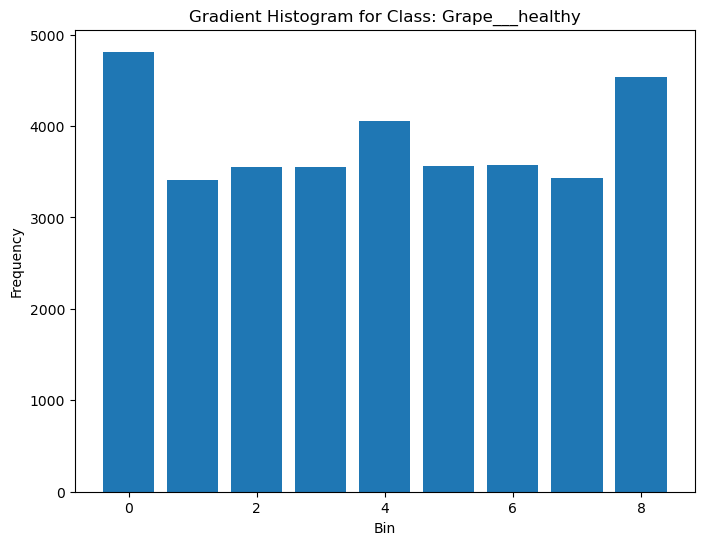

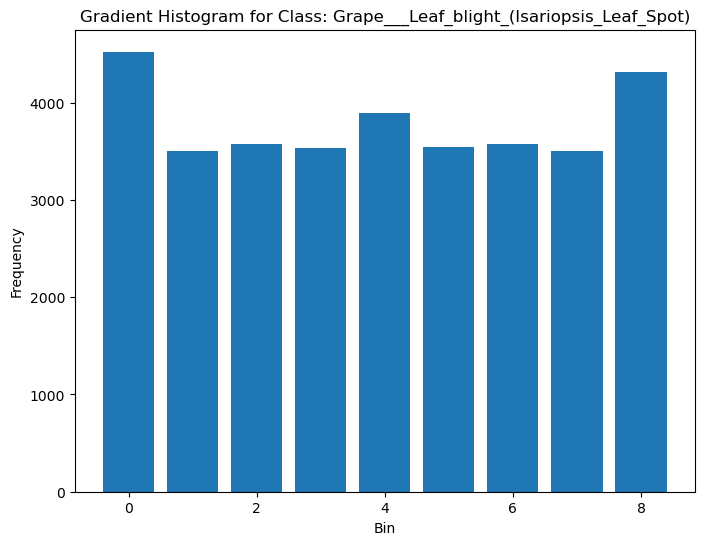

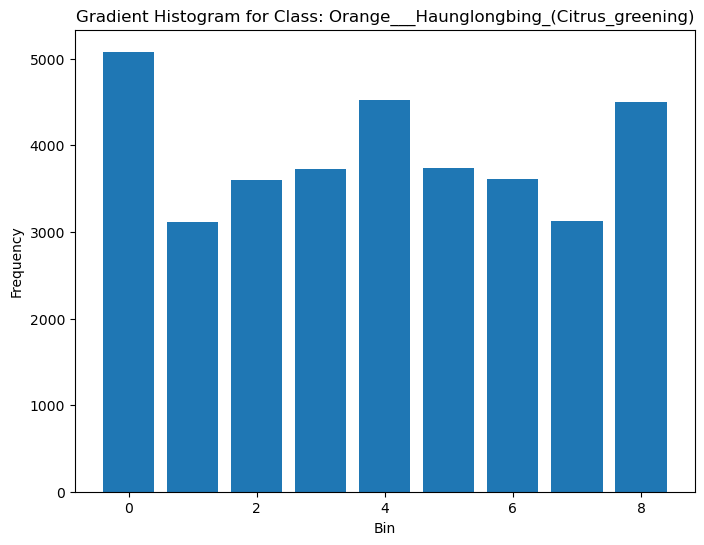

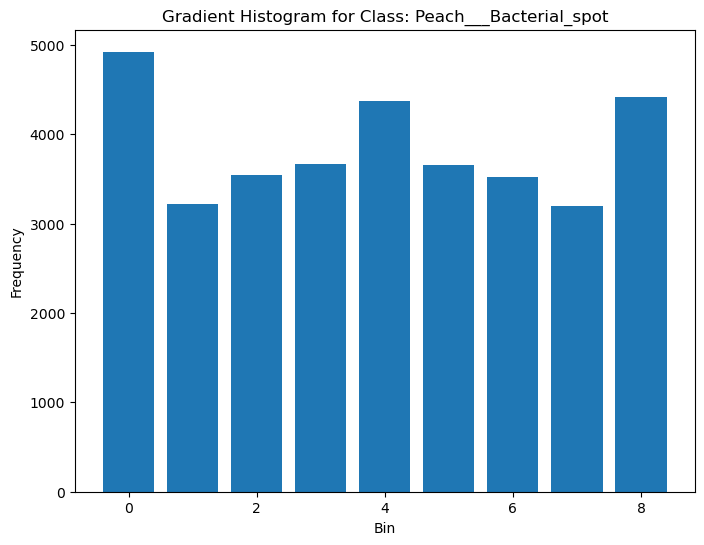

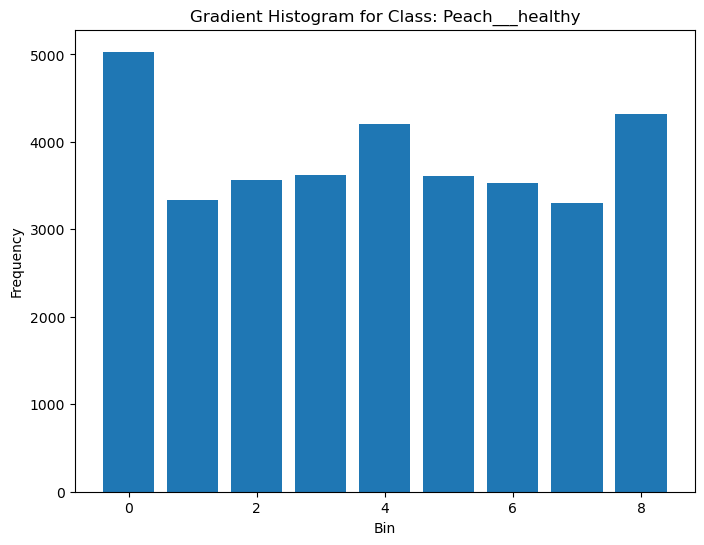

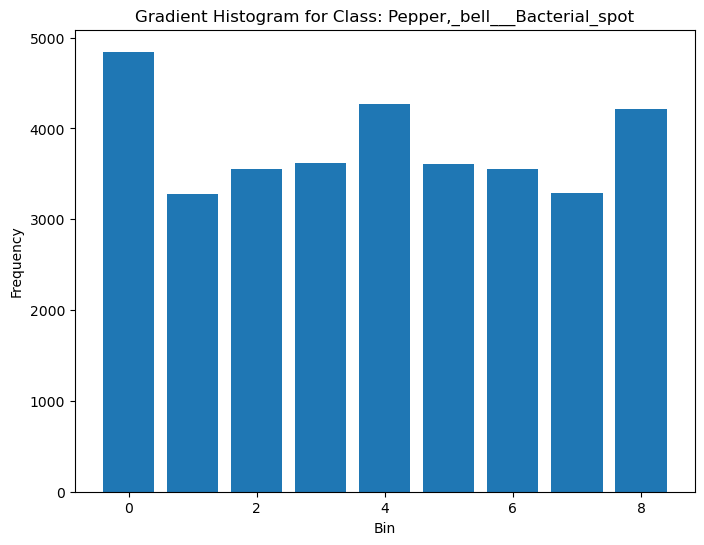

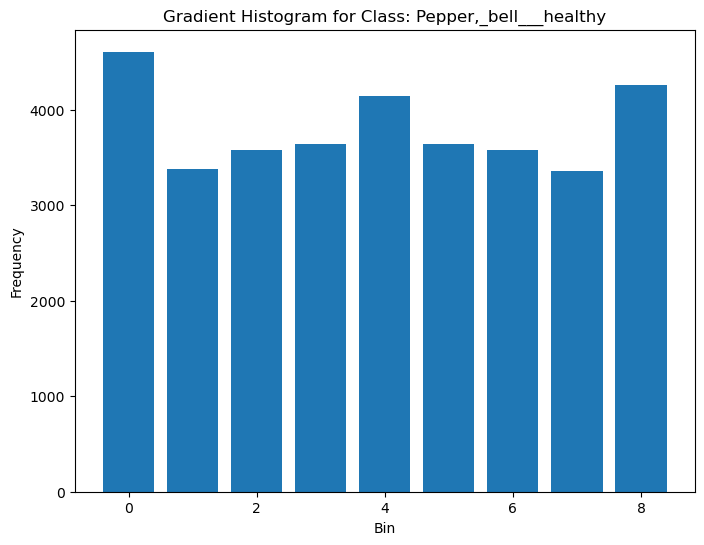

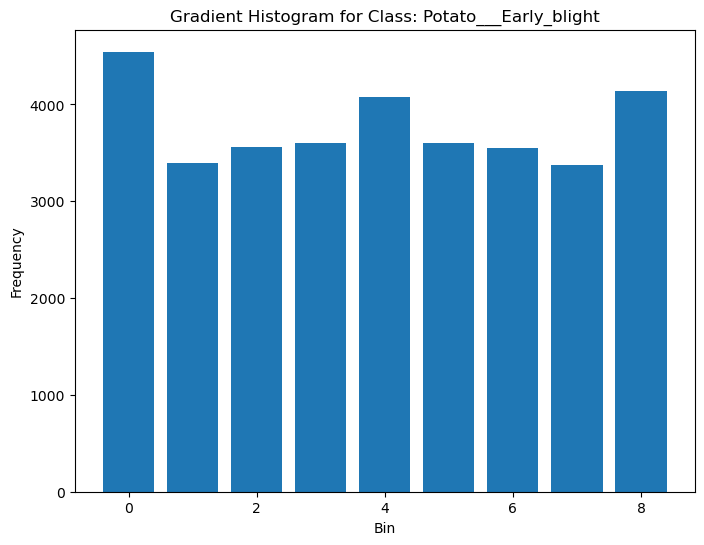

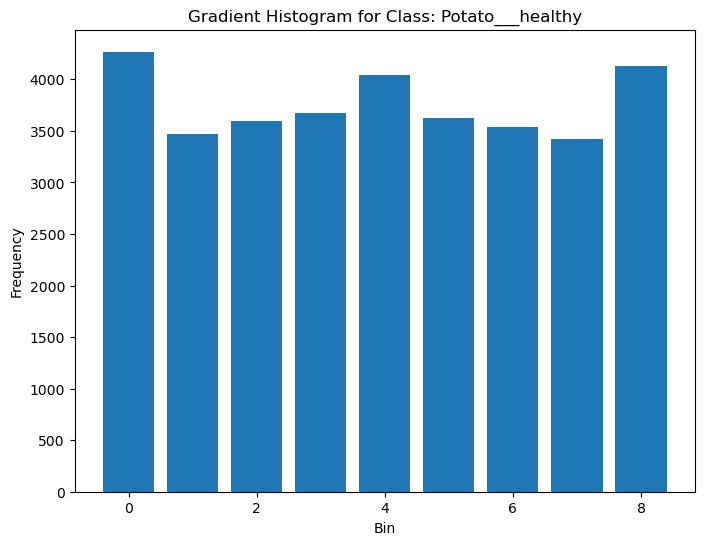

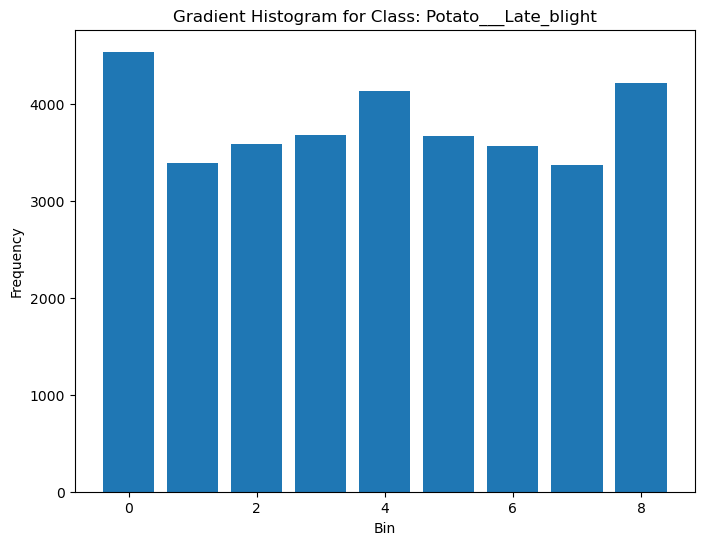

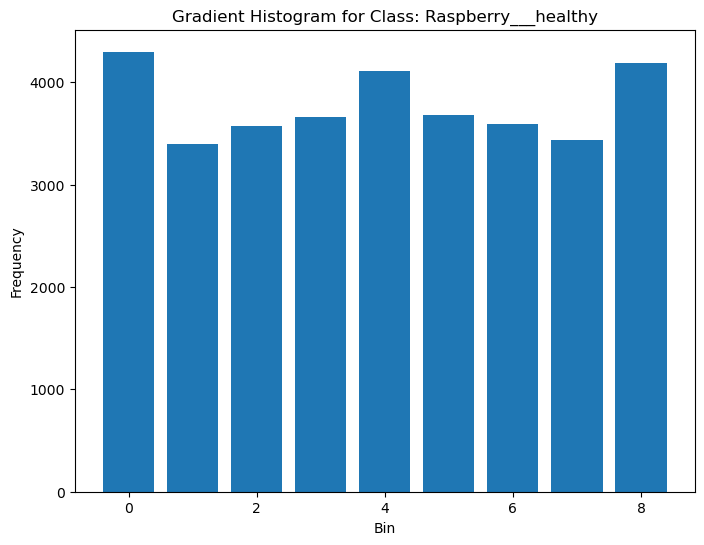

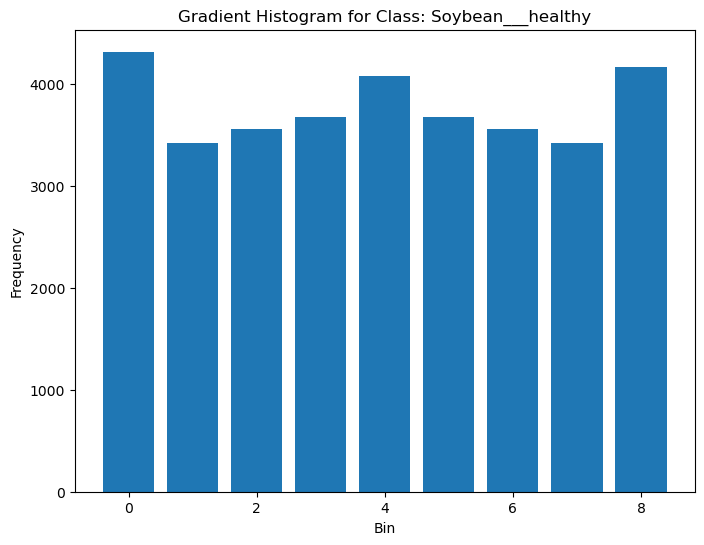

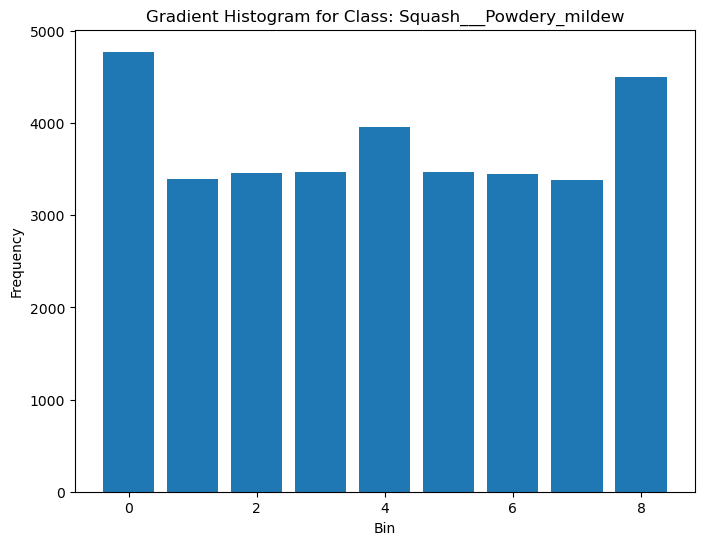

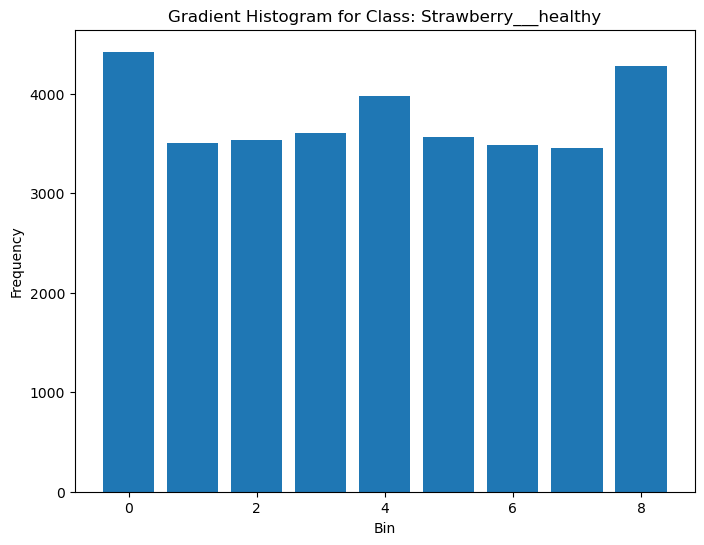

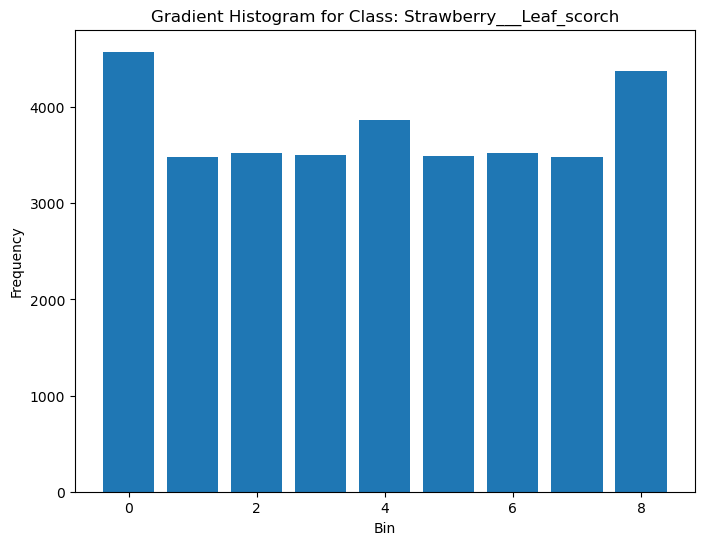

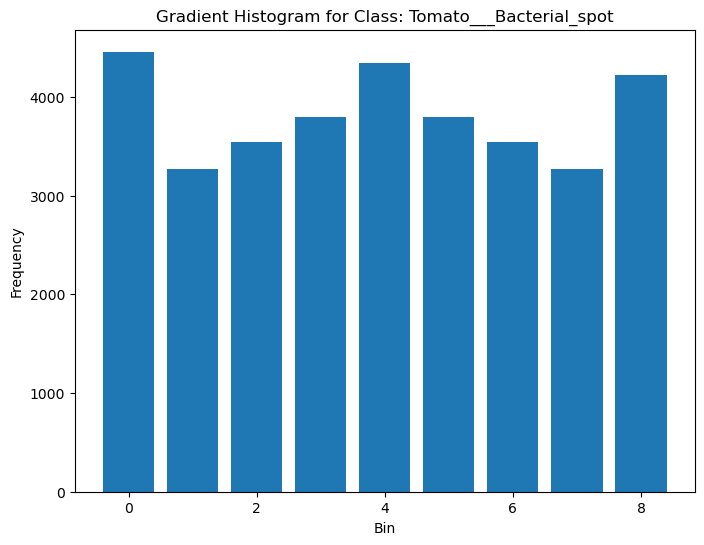

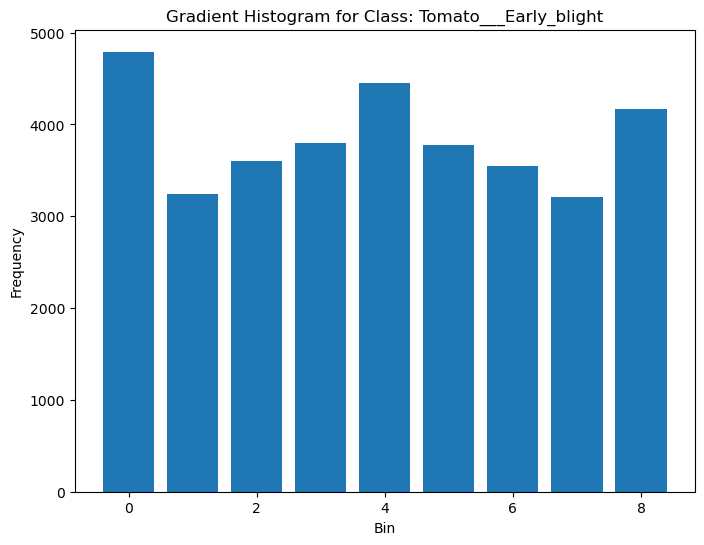

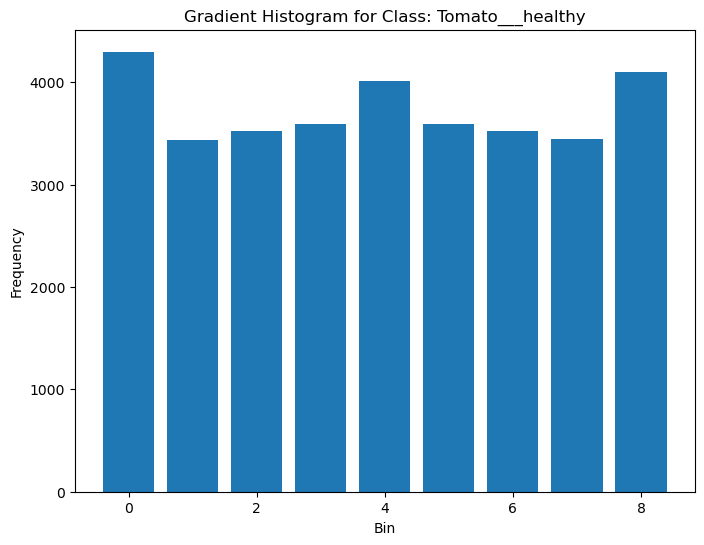

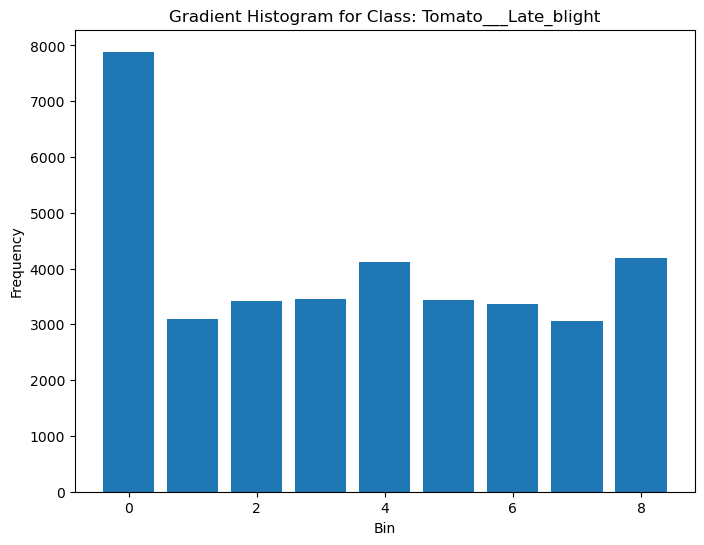

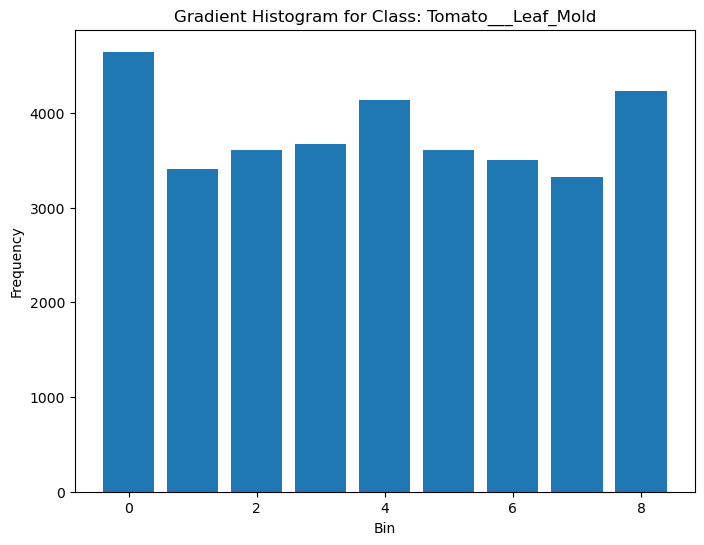

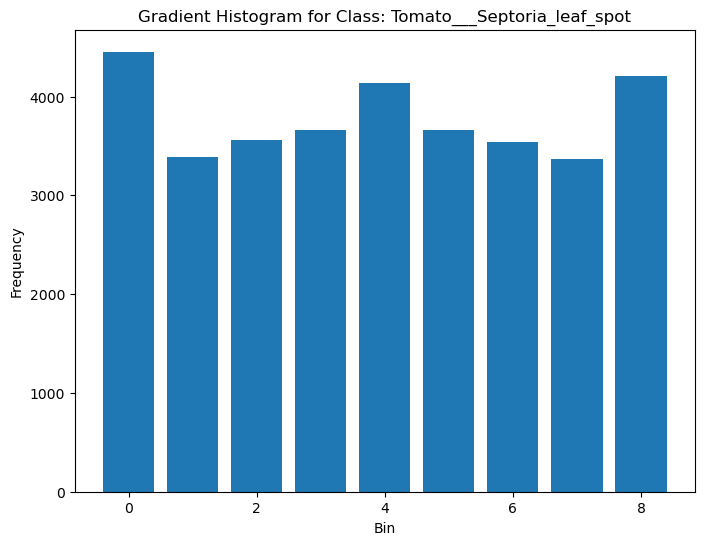

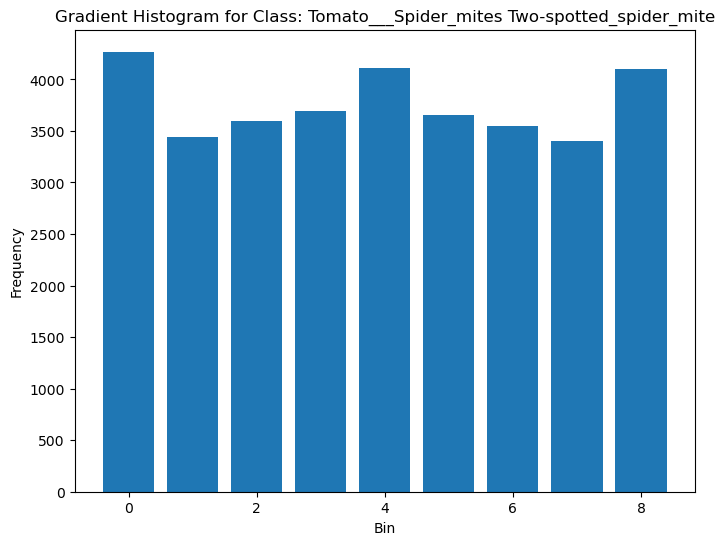

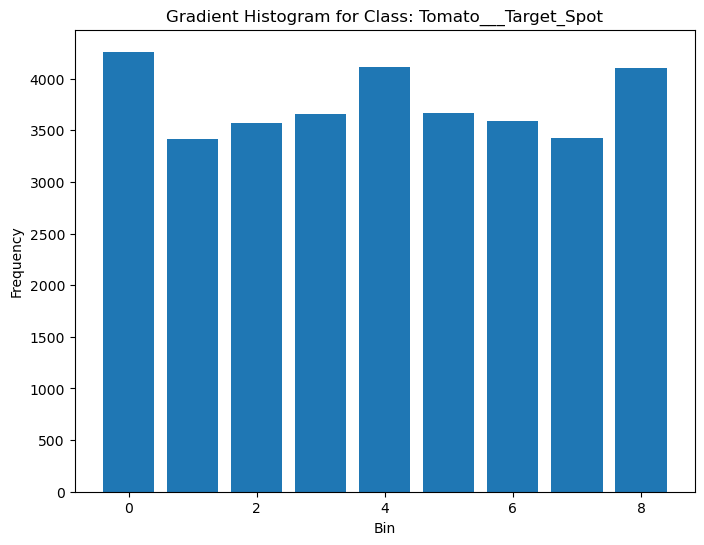

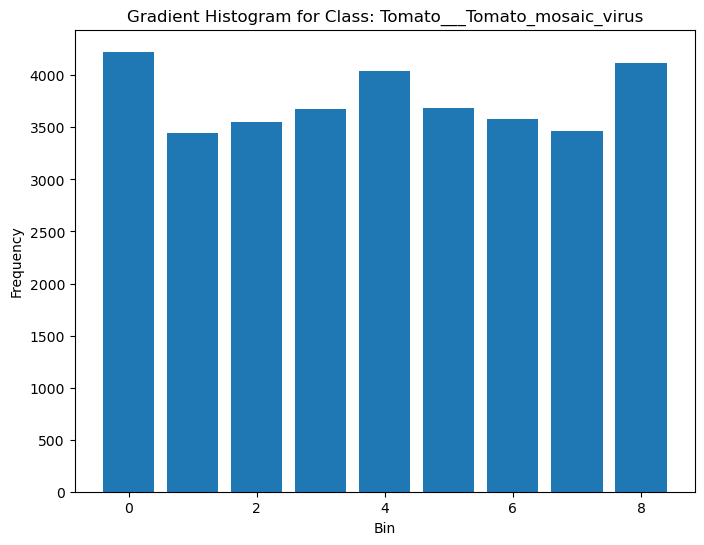

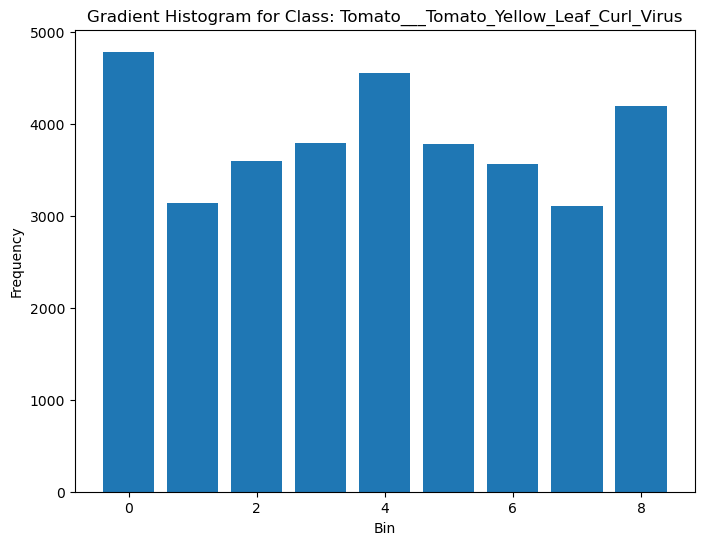

In [20]:
# Function to compute histograms of color pixel values
def compute_color_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Function to compute gradients and histograms of gradients
def compute_gradients_and_histogram(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    hist = np.histogram(angle, bins=9, range=(0, 180))[0]
    return hist

# Function to extract characteristics of images in the dataset
def extract_image_characteristics(dataset_dir):
    characteristics_per_class = {}

    # Iterate through each class folder in the dataset directory
    for class_folder in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_folder)
        class_characteristics = {
            'image_sizes': [],
            'color_histograms': [],
            'gradient_histograms': []
        }

        # Iterate through each image in the class folder
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            
            # Get size of the image
            height, width, _ = image.shape
            class_characteristics['image_sizes'].append((height, width))
            
            # Compute color histogram
            color_hist = compute_color_histogram(image)
            class_characteristics['color_histograms'].append(color_hist)
            
            # Compute gradients and histogram of gradients
            gradient_hist = compute_gradients_and_histogram(image)
            class_characteristics['gradient_histograms'].append(gradient_hist)

        characteristics_per_class[class_folder] = class_characteristics

    return characteristics_per_class

# Call the function to extract characteristics
characteristics_per_class = extract_image_characteristics(dataset_dir)

# Plot histograms of color pixel values for each class
for class_name, characteristics in characteristics_per_class.items():
    color_histograms = np.array(characteristics['color_histograms'])
    mean_hist = np.mean(color_histograms, axis=0)
    
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(len(mean_hist)), mean_hist)
    plt.title(f'Color Histogram for Class: {class_name}')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms of gradients for each class
for class_name, characteristics in characteristics_per_class.items():
    gradient_histograms = np.array(characteristics['gradient_histograms'])
    mean_hist = np.mean(gradient_histograms, axis=0)
    
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(len(mean_hist)), mean_hist)
    plt.title(f'Gradient Histogram for Class: {class_name}')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')
    plt.show()


Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

In [32]:
# List of search words
plant_names = ["Apple", "Blueberry", "Cherry","Corn","Grape","Orange","Peach","Strawberry","Squash","Pepper","Potato","Soybean","Tomato","Raspberry"]  # Add more search words as needed

# Dictionary to store the count of files for each search word
images_count = {}

# Count the number of files for each search word
for plant in plant_names:
    count = sum(1 for path in file_paths if plant in path)
    healthy_count = sum(1 for path in file_paths if plant.lower() in path.lower() and "healthy" in path.lower())
    unhealthy_count = count - healthy_count

    images_count[plant] = {"Total": count, "Healthy": healthy_count, "Unhealthy": unhealthy_count}
    
# Convert dictionary to pandas DataFrame
df = pd.DataFrame(images_count).T

# Print table output
print(df)


            Total  Healthy  Unhealthy
Apple        3171     1645       1526
Blueberry    1502     1502          0
Cherry       1906      854       1052
Corn         3852     1162       2690
Grape        4062      423       3639
Orange       5507        0       5507
Peach        2657      360       2297
Strawberry   1565      456       1109
Squash       1835        0       1835
Pepper       2475     1478        997
Potato       2152      152       2000
Soybean      5090     5090          0
Tomato      18160     1591      16569
Raspberry     371      371          0


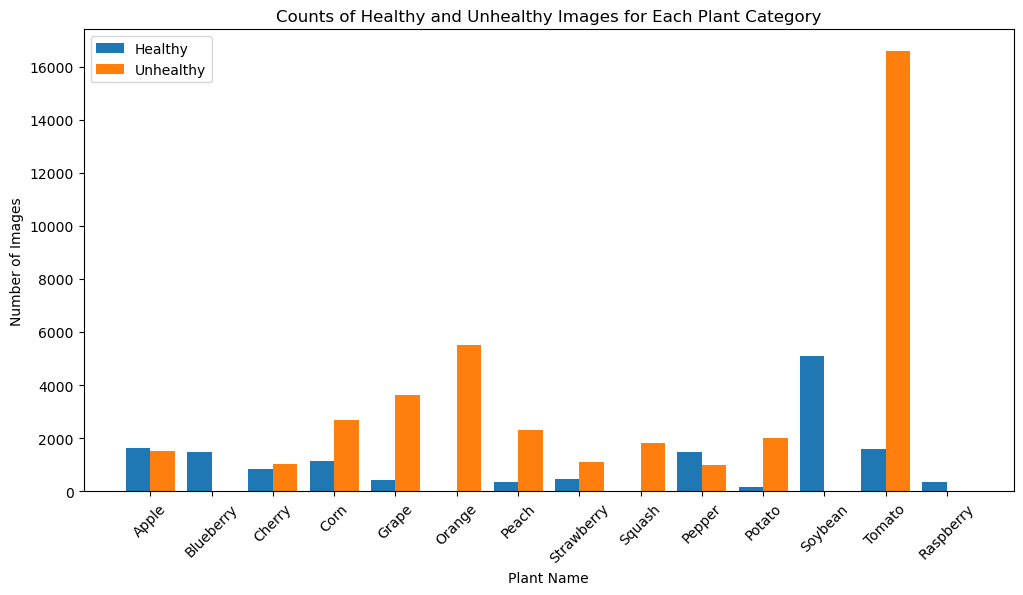

In [69]:
# Calculate the total number of plant categories
num_plants = len(plant_names)

# Set the width of the bars
bar_width = 0.40

# Create an array of indices for each plant category
ind = np.arange(num_plants)

# Plot histograms for healthy and unhealthy images separately
fig, ax = plt.subplots(figsize=(12, 6))

# Plot healthy images
healthy_bars = ax.bar(ind, df['Healthy'], bar_width, label='Healthy')

# Plot unhealthy images
unhealthy_bars = ax.bar(ind + bar_width, df['Unhealthy'], bar_width, label='Unhealthy')

# Add labels, title, and legend
ax.set_xlabel('Plant Name')
ax.set_ylabel('Number of Images')
ax.set_title('Counts of Healthy and Unhealthy Images for Each Plant Category')
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(plant_names, rotation=45)
ax.legend()

# Show plot
plt.show()

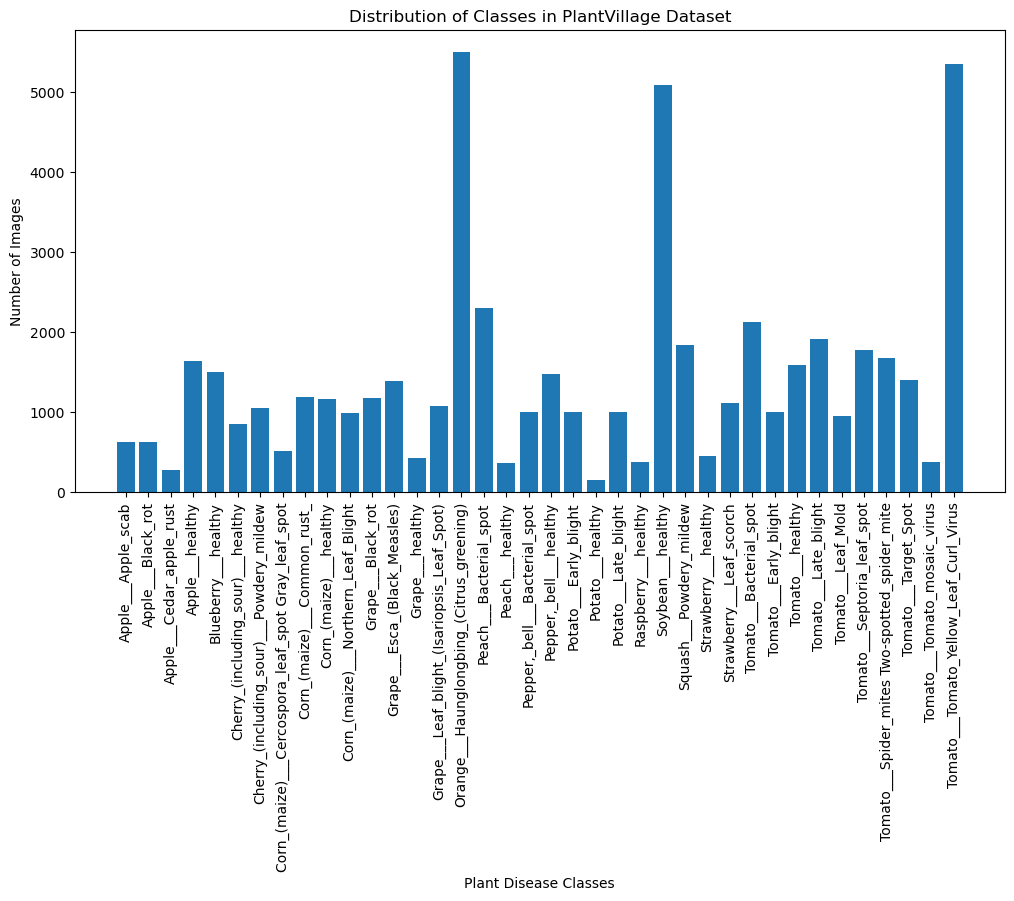

The dataset is considered unbalanced.


In [35]:
# Function to count the number of images per class
def count_images_per_class(dataset_dir):
    class_counts = {}
    # Iterate through each class folder in the dataset directory
    for class_folder in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_folder)
        # Count the number of images in the class folder
        num_images = len(os.listdir(class_path))
        class_counts[class_folder] = num_images
    return class_counts

# Call the function to count images per class
class_counts = count_images_per_class(dataset_dir)

# Plot the distribution of classes
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Distribution of Classes in PlantVillage Dataset')
plt.xlabel('Plant Disease Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.show()

# Check if the data is balanced
min_count = min(class_counts.values())
max_count = max(class_counts.values())
is_balanced = min_count / max_count >= 0.8  # Define a threshold for balance
if is_balanced:
    print("The dataset is considered balanced.")
else:
    print("The dataset is considered unbalanced.")


### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

1. Is your data balanced?
According to the above output, the dataset is imbalanced

2. Are there disparities in your input data? Does it show some specific patterns?
Based on the data provided earlier regarding crops and their health status (healthy or unhealthy), we can observe several disparities and specific patterns:

Imbalanced Distribution: There is a significant imbalance between the counts of healthy and unhealthy crops for many types. For instance, crops like Orange and Squash are entirely classified as Unhealthy and Soybean is entirely classified as healthy, indicating a lack of diversity in health status within these crops.

Partial Imbalance: Some crops show a partial imbalance, where one category has a noticeably higher count than the other, but the disparity is not as extreme as in other cases. Examples include crops like Apple and Cherry, where the unhealthy category has a higher count but not overwhelmingly so.

Sparse Data: A few crops have very few samples, making it challenging to draw definitive conclusions about their balance or imbalance. For instance, Raspberry has only one category (healthy) represented in the data, indicating a lack of information about unhealthy instances for this crop.

In summary, the input data exhibits disparities in terms of the distribution of healthy and unhealthy crops, with some crops being heavily skewed towards one category. These patterns can provide insights into potential agricultural challenges, research priorities, or areas where intervention may be needed to improve crop health and yield.